# Gauss2D

I try to reproduce results from this article: https://yugeten.github.io/posts/2019/09/GP/

In [73]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal

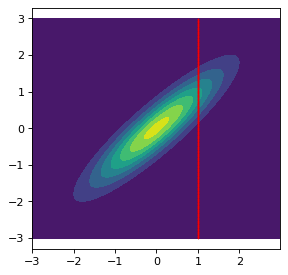

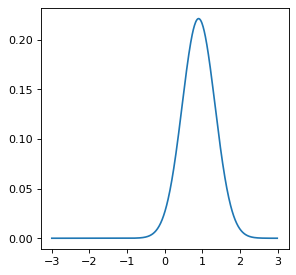

In [74]:
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x;
pos[:, :, 1] = y


mean = [0, 0]
variance_covariance_matrix = [
    [1, .9],
    [.9, 1],
]

rv = multivariate_normal(mean, variance_covariance_matrix)

z = rv.pdf(pos)

fig, ax = plt.subplots(figsize=(4, 4), dpi=80)

ax.contourf(x, y, z)

target = 1

column_idx_where_equal_to_target = int((target - x.min()) / .01)

ax.scatter(x[column_idx_where_equal_to_target, :],
           y[column_idx_where_equal_to_target, :],
           c="red",
           s=0.1)

fig2, ax2 = plt.subplots(figsize=(4, 4), dpi=80)
ax2.plot(y[column_idx_where_equal_to_target, :], z[column_idx_where_equal_to_target, :])

[1.0225284660843315, 1.2675574323626924, 0.6819932567295764, 0.9330776506195626, 1.0095902978853832, 1.040966288512191, 1.0969847573445113, 1.0770123680817183, 0.8926526992670075, 0.22836212380044107, 0.3488374585413263, 1.7694169350736453, 1.170787113785659, 1.3229623994175008, 0.639091786045764, 1.3117300477946638, 0.7473189757457424, 1.26822997564335]


/usr/local/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.95312500e+00,  1.95998047e-03,  1.42756372e-03]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 12, 'warnflag': 2}
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.95751953,  0.00534577,  0.00470788]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 73, 'nit': 17, 'warnflag': 2}
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.95166016e+00,  4.88469377e-05, -4.25784965e-04]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 112, 'nit': 17, 'warnflag': 2}
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packag

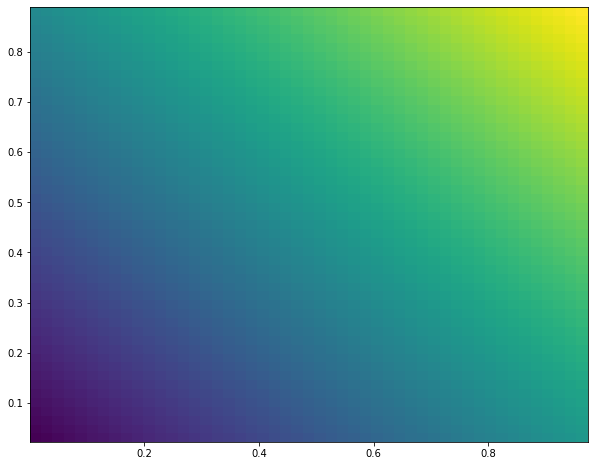

In [103]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(X):
    return X[0:] + X[1:]

X = np.random.rand(18, 2)
y = [x[0]+x[1] for x in X]

print(y)

# Input space
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x = (np.array([x1, x2])).T

kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)

X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

# alternative way to generate equivalent X0p, X1p, Zp
# X0p, X1p = np.meshgrid(x1, x2)
# Zp = [gp.predict([(X0p[i, j], X1p[i, j]) for i in range(X0p.shape[0])]) for j in range(X0p.shape[1])]
# Zp = np.array(Zp).T

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.pcolormesh(X0p, X1p, Zp)

plt.show()